In [1]:
import pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def capturar_foto(nome_arquivo='foto.jpg', qualidade=0.8):
    # Inicializa a câmera
    cap = cv2.VideoCapture(0)
    
    # Captura um frame
    ret, frame = cap.read()
    
    # Verifica se o frame foi capturado com sucesso
    if ret:
        # Salva a imagem
        cv2.imwrite(nome_arquivo, frame, [int(cv2.IMWRITE_JPEG_QUALITY), int(qualidade * 100)])
        print(f"Foto salva como {nome_arquivo}")
    else:
        print("Falha ao capturar imagem.")
    
    # Libera a câmera
    cap.release()
    cv2.destroyAllWindows()


In [3]:
with open('pca_svm_pipeline_with_labels.pkl', 'rb') as model_file:
    loaded_pipeline, class_names = pickle.load(model_file)


In [4]:
def crop_rate(img, x,y,largura,altura, largura_lfw = 94, altura_lfw = 125, interpolation=cv2.INTER_AREA): #cv2.INTER_AREA
      razao_aspecto = altura_lfw/largura_lfw
      centro_x = x + largura/2
      centro_y = y + altura/2
      area = largura*altura
      largura_adj = np.sqrt(area/razao_aspecto)
      altura_adj = razao_aspecto*largura_adj
      x_min = int(np.floor(centro_x-largura_adj/2))
      x_max = int(np.ceil(centro_x+largura_adj/2))
      y_min = int(np.floor(centro_y-altura_adj/2 + 0.5))
      y_max = int(np.ceil(centro_y+altura_adj/2 + 0.5))
      if y_min <0:
         y_max -= y_min
         y_min = 0
      if x_min <0:
         x_max -= x_min
         x_min = 0
      # Centralize and crop
      crop_img = img[y_min:y_max, x_min:x_max]
      img_lfw = cv2.resize(crop_img, (largura_lfw, altura_lfw), interpolation=interpolation)

      return img_lfw


Foto salva como foto.jpg
Previsão para a nova amostra: [21]
Previsão para a nova amostra: Gustavo G Rigor


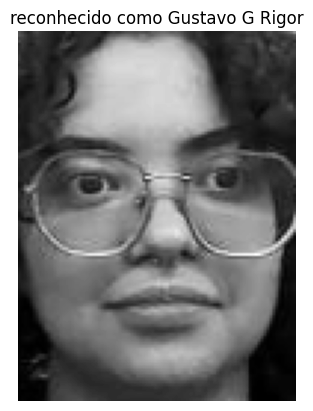

In [62]:
capturar_foto()

image_path = 'foto.jpg'

image_org = cv2.imread(image_path)
plt.imshow(image_org),plt.title('image'),plt.axis('off')
image = cv2.cvtColor(image_org,cv2.COLOR_RGB2GRAY)
image_org = cv2.cvtColor(image_org,cv2.COLOR_RGB2GRAY)

haar_face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

rostos = haar_face_cascade.detectMultiScale(image)

x, y, largura, altura = rostos[rostos[:,-1].argsort()[-1]] #
image_data = [x,y,largura,altura]
plt.imshow(image[y:y+altura, x:x+largura], cmap='gray'),plt.title('Rosto Escolhido')


image = crop_rate(image_org,x=image_data[0],y=image_data[1],largura=image_data[2],altura=image_data[3])#,largura_lfw =largura, altura_lfw = altura)

prediction = loaded_pipeline.predict([image.reshape(1, -1)[0]])
person_name = class_names[prediction[0]]

plt.imshow(image, cmap='gray'),plt.title(f'reconhecido como {person_name}')

print("Previsão para a nova amostra:", prediction)
print("Previsão para a nova amostra:", person_name)


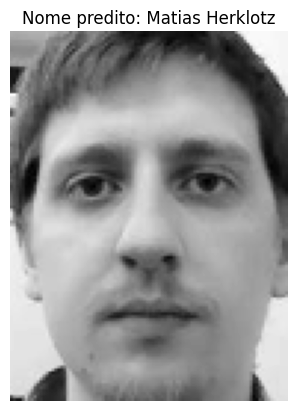

In [37]:
import os

# Get the list of files in the "images" folder
folder_path = 'images'
file_list = os.listdir(folder_path)

# Loop through each file
for file_name in file_list:
    # Construct the full path of the image file
    image_path = os.path.join(folder_path, file_name)

    # Load the image
    image_org = cv2.imread(image_path)
    plt.imshow(image_org),plt.title('image'),plt.axis('off')
    image = cv2.cvtColor(image_org,cv2.COLOR_RGB2GRAY)
    image_org = cv2.cvtColor(image_org,cv2.COLOR_RGB2GRAY)

    haar_face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

    rostos = haar_face_cascade.detectMultiScale(image)

    x, y, largura, altura = rostos[rostos[:,-1].argsort()[-1]] #
    image_data = [x,y,largura,altura]
    plt.imshow(image[y:y+altura, x:x+largura], cmap='gray'),plt.title('Rosto Escolhido')

    image = crop_rate(image_org,x=image_data[0],y=image_data[1],largura=image_data[2],altura=image_data[3])#,largura_lfw =largura, altura_lfw = altura)
    
    prediction = loaded_pipeline.predict([image.reshape(1, -1)[0]])
    person_name = class_names[prediction[0]]
    
    plt.imshow(image, cmap='gray'),plt.title(f'Nome predito: {person_name}')
